$\textbf{Value Iteration implemented for the reset application}$

The pseudo-code for Value Iteration can be found in Algorithm 1.

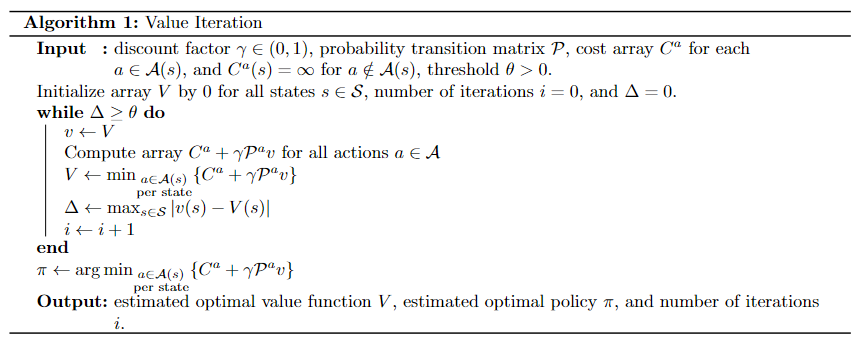

The implementation of this algorithm for can be found in the code below.

In [1]:

import numpy as np
import time


Initializing the algorithm's parameters:

In [6]:
# discount factor
gamma=0.3

# nr of episodes
nrepisodes = 2000

# number of states - 1
N=3

# stopping criterium threshold
theta=0.000000001


Initializing the probability transition matrix:

In [ ]:
# P_A
P = np.diag(np.ones(N),1)
P[N,0]=1


In [3]:
# P_B
P = np.diag(1/2*np.ones(N),1)+np.diag(1/2*np.ones(N),-1)
P[-1,-2]=1
P[0,1]=1


In [ ]:
# P_C
P = 1/4*np.ones([N+1,N+1])


Initializing the cost realization:

In [4]:
# Realization 1

# Cost for action = 0
C_0=np.zeros(N+1)

# Cost for action = 1
C_1=np.arange(N+1,dtype=float)
C_1[N]=2*N


In [ ]:
# Realization 2

# Cost for action = 0
C_0=np.arange(N+1,dtype=float)+1 

# Cost for action = 1
K=2
C_1=K*C_0


In [ ]:
# Realization 3

# Cost for action = 0
C_0=1/np.arange(N+1,0,-1,dtype=float)

# Cost for action = 1
C_1=10**np.arange(N+1,dtype=float)


Running the Value Iteration algorithm.

In [7]:

# Putting the cost for "illegal actions" to infinity
C_0[N]=float("inf")
C_1[0]=float("inf")

# Initializing value function for action = 0
Vn_0=np.zeros(N+1)
# Initializing value function for action = 1
Vn_1=np.zeros(N+1)
# Initializing value function
Vn=np.zeros(N+1)

# Number of iterations counter
it=0

## Value Iteration:
while True:
    Vnold=Vn.copy()
    
    # Computing C+gamma*P*V for action = 0
    Vn_0=C_0+gamma*P@Vn 
    
    # Computing C+gamma*P*V for action = 1
    Vn_1=C_1+gamma*np.repeat(Vn[0],N+1)
    
    # Selecting the minimum value for each state
    Vn=np.minimum(Vn_0,Vn_1) 
    
    # Finding the action that minimizes the value for each state
    # here, axis=0 selects the row (=action) for which the value in the column (=state) is minimized
    policy=np.argmin(np.array([Vn_0,Vn_1]),axis=0) 
    
    # Delta = max_{s in S} |V_{n-1}-V_n|
    Delta=abs(Vnold-Vn).max()
    
    # Incrementing the number of iterations by 1
    it+=1
    
    # Checking if convergence criterium Delta<theta has been achieved
    if Delta<theta:
        break

        
        

$\textit{Example}:$ cost realization 1 with transition matrix $\mathcal{P}_B$ for $\gamma=0.3$ and $N=3$.

In [8]:
print("Optimal policy: \n",policy)
print("Optimal value: \n",Vn)

Optimal policy: 
 [0 0 0 1]
Optimal value: 
 [0.04352616 0.14508719 0.92372175 6.01305785]
